<a href="https://colab.research.google.com/github/PanavShah1/DAV_assignment/blob/main/DAV_Q1_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DAV Assignment Q1 and Q2
You are the head of the sales and marketing division of “The Renewables”
, a
company that sells renewable energy solutions to people. Recognizing India's
vast potential for renewable energy growth, you decide to extend your
operations into this dynamic market. To make informed decisions, you need to
understand the country's energy landscape, including its actual and installed
energy capacities.
For this you turned to the NDAP for comprehensive data on India's energy
sector,and obtained this dataset from there:


## Q1: Ask 10 reasonably involved questions and try to answer them by analyzing the Dataset.


In [ ]:
# Import libraries
import requests
from pathlib import Path
import zipfile
import os


request = requests.get("https://github.com/PanavShah1/DAV_assignment/blob/main/Power_Generation_Dataset.csv?raw=true")
with open("Power_Generation_Dataset.csv", "wb") as f:
  f.write(request.content)
  print("csv file downloaded")


csv file downloaded


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Power_Generation_Dataset.csv")
df.head(5)

,ROWID,Country,State LGD Code,State,Actual energy generated,Category of Plant,Type of fuel used,Installed Capacity,Generation Programme is prepared by CEA,Region,Region ID,Sector of power plant,Name of coal company,Station Name,SourceMonth,SourceYear,YearCode,Year,MonthCode,Month
0,1,India,22,Chhattisgarh,0.0,THERMAL,COAL,0.0,0.0,WESTERN,REG2,PRIVATE IPP,WPCL,AKALTARA TPS,Apr - 2008,2008,2008,"Calendar Year (Jan - Dec), 2008",200804,"April, 2008"
1,2,India,2,Himachal Pradesh,0.0,HYDRO,HYDRO,0.0,0.0,NORTHERN,REG1,PRIVATE IPP,ADHPL,ALLAIN DUHANGAN HPS,Apr - 2008,2008,2008,"Calendar Year (Jan - Dec), 2008",200804,"April, 2008"
2,3,India,27,Maharashtra,0.0,THERMAL,COAL,0.0,0.0,WESTERN,REG2,PRIVATE IPP,IBPL,AMARAVATI TPS,Apr - 2008,2008,2008,"Calendar Year (Jan - Dec), 2008",200804,"April, 2008"
3,4,India,9,Uttar Pradesh,0.0,THERMAL,COAL,0.0,0.0,NORTHERN,REG1,PRIVATE IPP,LAPPL,ANPARA C TPS,Apr - 2008,2008,2008,"Calendar Year (Jan - Dec), 2008",200804,"April, 2008"
4,5,India,22,Chhattisgarh,0.0,THERMAL,COAL,0.0,0.0,WESTERN,REG2,PRIVATE IPP,KWPCL,AVANTHA BHANDAR,Apr - 2008,2008,2008,"Calendar Year (Jan - Dec), 2008",200804,"April, 2008"


In [ ]:
len(df)

46675

In [ ]:
states = df['State'].unique()
states

array(['Chhattisgarh', 'Himachal Pradesh', 'Maharashtra', 'Uttar Pradesh',
       'Jammu Kashmir', 'Bihar', 'Rajasthan', 'Tamil Nadu',
       'Madhya Pradesh', 'Assam', 'Sikkim', 'Odisha', 'West Bengal',
       'Andhra Pradesh', 'Punjab', 'Gujarat', 'Haryana', 'Telangana',
       'Jharkhand', 'Uttarakhand', 'Kerala', 'Meghalaya', 'Ladakh',
       'Delhi', 'Karnataka', 'Tripura', 'Arunachal Pradesh', 'Puducherry',
       'Manipur', 'Andaman And Nicobar Islands', 'Goa', 'New Delhi',
       'Mizoram'], dtype=object)

In [ ]:
plants = df['Category of Plant'].unique()
plants

array(['THERMAL', 'HYDRO', 'NUCLEAR'], dtype=object)

In [ ]:
fuels = df['Type of fuel used'].unique()
fuels

array(['COAL', 'HYDRO', 'LIGNITE', 'GAS', 'NUCLEAR', 'MULTI FUEL',
       'NATURAL GAS', 'THERMAL', 'DIESEL', 'HIGH SPEED DIESEL', 'NAPTHA'],
      dtype=object)

In [ ]:
sectors = df['Sector of power plant'].unique()
sectors

array(['PRIVATE IPP', 'STATE', 'CENTRAL', 'PRIVATE', 'PVT'], dtype=object)

In [ ]:
years = df['YearCode'].unique()
years

array([2008, 2009, 2010, 2012, 2011, 2013, 2014, 2015, 2016, 2017])

### Q1: How many Thermal, Hydro and Nuclear Plants are there in India?

#### A1:

In [ ]:
num_thermal = len(df.loc[df['Category of Plant'] == 'THERMAL'])
num_hydro = len(df.loc[df['Category of Plant'] == 'HYDRO'])
num_nuclear = len(df.loc[df['Category of Plant'] == 'NUCLEAR'])
print(f'There are {num_thermal} Thermal Plants, {num_hydro} Hydro Plants and {num_nuclear} Nuclear Plants in India')

There are 26427 Thermal Plants, 19465 Hydro Plants and 783 Nuclear Plants in India


### Q2: How many plants use the different types of fuels

In [ ]:
num_fuels = {fuel: 0 for fuel in fuels}
num_fuels

{'COAL': 0,
 'HYDRO': 0,
 'LIGNITE': 0,
 'GAS': 0,
 'NUCLEAR': 0,
 'MULTI FUEL': 0,
 'NATURAL GAS': 0,
 'THERMAL': 0,
 'DIESEL': 0,
 'HIGH SPEED DIESEL': 0,
 'NAPTHA': 0}

In [ ]:
for fuel in num_fuels:
    condition = len(df.loc[df['Type of fuel used'] == fuel])
    num_fuels[fuel] = condition

#### A2:

In [ ]:
for fuel in num_fuels:
  print(f"There are {num_fuels[fuel]} plants using {fuel}")

There are 17380 plants using COAL
There are 19465 plants using HYDRO
There are 986 plants using LIGNITE
There are 4795 plants using GAS
There are 783 plants using NUCLEAR
There are 137 plants using MULTI FUEL
There are 1220 plants using NATURAL GAS
There are 20 plants using THERMAL
There are 1177 plants using DIESEL
There are 267 plants using HIGH SPEED DIESEL
There are 445 plants using NAPTHA


### Q3: What fuels do the Thermal, Hydro and Nuclear plants use

In [ ]:
plant_data = {plant: {fuel: 0 for fuel in num_fuels} for plant in plants}
plant_data

{'THERMAL': {'COAL': 0,
  'HYDRO': 0,
  'LIGNITE': 0,
  'GAS': 0,
  'NUCLEAR': 0,
  'MULTI FUEL': 0,
  'NATURAL GAS': 0,
  'THERMAL': 0,
  'DIESEL': 0,
  'HIGH SPEED DIESEL': 0,
  'NAPTHA': 0},
 'HYDRO': {'COAL': 0,
  'HYDRO': 0,
  'LIGNITE': 0,
  'GAS': 0,
  'NUCLEAR': 0,
  'MULTI FUEL': 0,
  'NATURAL GAS': 0,
  'THERMAL': 0,
  'DIESEL': 0,
  'HIGH SPEED DIESEL': 0,
  'NAPTHA': 0},
 'NUCLEAR': {'COAL': 0,
  'HYDRO': 0,
  'LIGNITE': 0,
  'GAS': 0,
  'NUCLEAR': 0,
  'MULTI FUEL': 0,
  'NATURAL GAS': 0,
  'THERMAL': 0,
  'DIESEL': 0,
  'HIGH SPEED DIESEL': 0,
  'NAPTHA': 0}}

In [ ]:
for plant in plants:
    for fuel in num_fuels:
        condition = (df['Category of Plant'] == plant) & (df['Type of fuel used'] == fuel)
        length = len(df.loc[condition])
        plant_data[plant][fuel] = length


In [ ]:
plant_data

{'THERMAL': {'COAL': 17380,
  'HYDRO': 0,
  'LIGNITE': 986,
  'GAS': 4795,
  'NUCLEAR': 0,
  'MULTI FUEL': 137,
  'NATURAL GAS': 1220,
  'THERMAL': 20,
  'DIESEL': 1177,
  'HIGH SPEED DIESEL': 267,
  'NAPTHA': 445},
 'HYDRO': {'COAL': 0,
  'HYDRO': 19465,
  'LIGNITE': 0,
  'GAS': 0,
  'NUCLEAR': 0,
  'MULTI FUEL': 0,
  'NATURAL GAS': 0,
  'THERMAL': 0,
  'DIESEL': 0,
  'HIGH SPEED DIESEL': 0,
  'NAPTHA': 0},
 'NUCLEAR': {'COAL': 0,
  'HYDRO': 0,
  'LIGNITE': 0,
  'GAS': 0,
  'NUCLEAR': 783,
  'MULTI FUEL': 0,
  'NATURAL GAS': 0,
  'THERMAL': 0,
  'DIESEL': 0,
  'HIGH SPEED DIESEL': 0,
  'NAPTHA': 0}}

#### A3:

In [ ]:
for plant in plants:
    for fuel in num_fuels:
        if plant_data[plant][fuel] == 0:
            continue
        print(f"There are {plant_data[plant][fuel]} {plant} plants using {fuel}")
    print()

There are 17380 THERMAL plants using COAL
There are 986 THERMAL plants using LIGNITE
There are 4795 THERMAL plants using GAS
There are 137 THERMAL plants using MULTI FUEL
There are 1220 THERMAL plants using NATURAL GAS
There are 20 THERMAL plants using THERMAL
There are 1177 THERMAL plants using DIESEL
There are 267 THERMAL plants using HIGH SPEED DIESEL
There are 445 THERMAL plants using NAPTHA

There are 19465 HYDRO plants using HYDRO

There are 783 NUCLEAR plants using NUCLEAR



### Q4: Graph the various fuels used in a Coal Plant

In [ ]:
x = fuels
y = [0 for i in range(len(fuels))]
for i, fuel in enumerate(list(fuels)):
  y[i] = plant_data['THERMAL'][fuel]
x, y

(array(['COAL', 'HYDRO', 'LIGNITE', 'GAS', 'NUCLEAR', 'MULTI FUEL',
        'NATURAL GAS', 'THERMAL', 'DIESEL', 'HIGH SPEED DIESEL', 'NAPTHA'],
       dtype=object),
 [17380, 0, 986, 4795, 0, 137, 1220, 20, 1177, 267, 445])

#### A4:

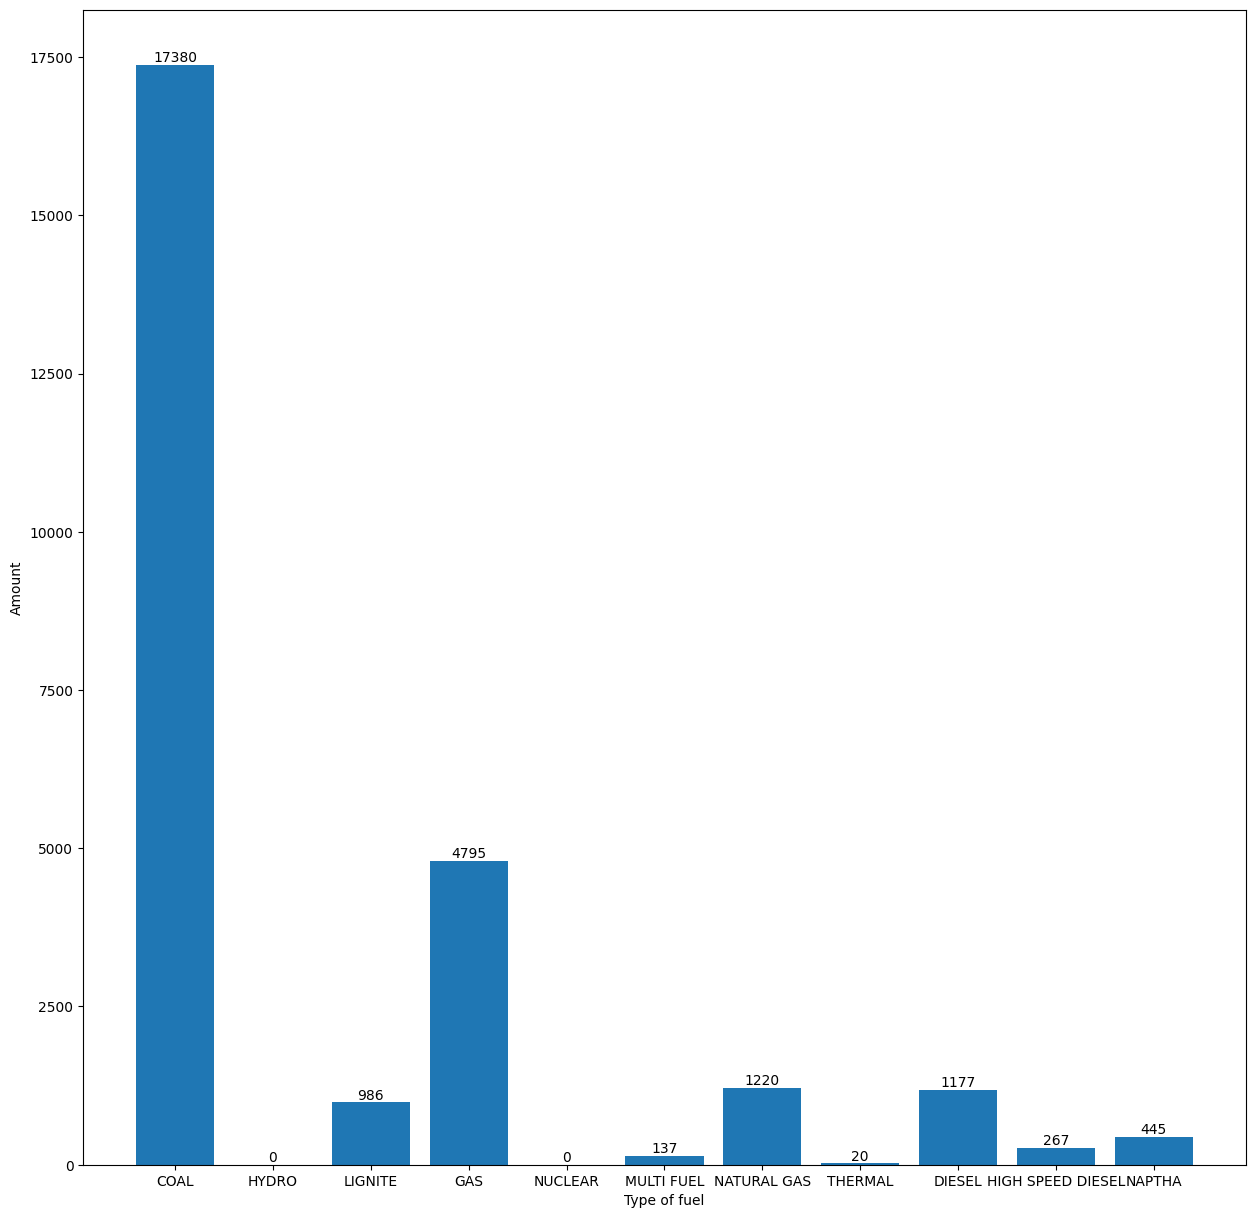

In [ ]:
fig = plt.figure(figsize=(15, 15))
plt.bar(x, y)
plt.xlabel("Type of fuel")
plt.ylabel("Amount")
for i, value in enumerate(y):
    plt.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=10)

### Q5: What is the plant distribution in the states of India

In [ ]:
num_states = {state: len(df.loc[df['State'] == state]) for state in states }
sorted(num_states)

['Andaman And Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chhattisgarh',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'New Delhi',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal']

In [ ]:
print("State: Number of plants\n")
for state in sorted(num_states):
    print(f"{state}: {num_states[state]}")

State: Number of plants

Andaman And Nicobar Islands: 107
Andhra Pradesh: 1785
Arunachal Pradesh: 18
Assam: 666
Bihar: 486
Chhattisgarh: 2476
Delhi: 678
Goa: 107
Gujarat: 3443
Haryana: 690
Himachal Pradesh: 1776
Jammu Kashmir: 1103
Jharkhand: 1196
Karnataka: 2545
Kerala: 1819
Ladakh: 107
Madhya Pradesh: 2218
Maharashtra: 4417
Manipur: 107
Meghalaya: 468
Mizoram: 3
New Delhi: 1
Odisha: 1643
Puducherry: 107
Punjab: 1471
Rajasthan: 1532
Sikkim: 412
Tamil Nadu: 4478
Telangana: 2191
Tripura: 827
Uttar Pradesh: 2959
Uttarakhand: 1427
West Bengal: 3412


In [ ]:
num_states = {k: v for k, v in sorted(num_states.items(), key=lambda item: item[1], reverse=True)}
num_states

{'Tamil Nadu': 4478,
 'Maharashtra': 4417,
 'Gujarat': 3443,
 'West Bengal': 3412,
 'Uttar Pradesh': 2959,
 'Karnataka': 2545,
 'Chhattisgarh': 2476,
 'Madhya Pradesh': 2218,
 'Telangana': 2191,
 'Kerala': 1819,
 'Andhra Pradesh': 1785,
 'Himachal Pradesh': 1776,
 'Odisha': 1643,
 'Rajasthan': 1532,
 'Punjab': 1471,
 'Uttarakhand': 1427,
 'Jharkhand': 1196,
 'Jammu Kashmir': 1103,
 'Tripura': 827,
 'Haryana': 690,
 'Delhi': 678,
 'Assam': 666,
 'Bihar': 486,
 'Meghalaya': 468,
 'Sikkim': 412,
 'Ladakh': 107,
 'Puducherry': 107,
 'Manipur': 107,
 'Andaman And Nicobar Islands': 107,
 'Goa': 107,
 'Arunachal Pradesh': 18,
 'Mizoram': 3,
 'New Delhi': 1}

#### A5:

Text(0, 0.5, 'Number of plants')

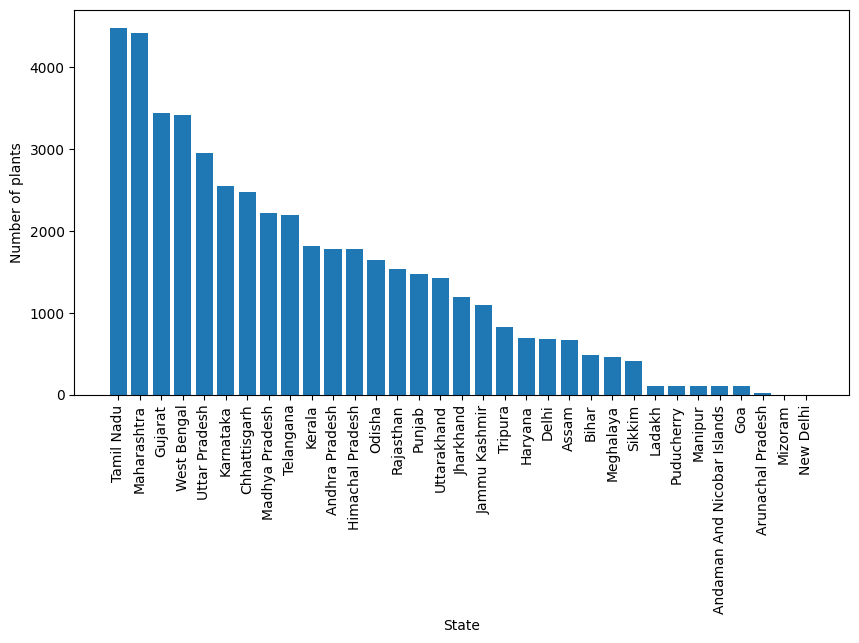

In [ ]:
fig = plt.figure(figsize=(10, 5))
plt.bar(num_states.keys(), num_states.values())
plt.xticks(rotation='vertical')
plt.xlabel("State")
plt.ylabel("Number of plants")

### Q6: What is the distribution of the Thermal, Hydro and Nuclear plants in each state

In [ ]:
state_data = {state: {plant: 0 for plant in plants} for state in states}
state_data

{'Chhattisgarh': {'THERMAL': 0, 'HYDRO': 0, 'NUCLEAR': 0},
 'Himachal Pradesh': {'THERMAL': 0, 'HYDRO': 0, 'NUCLEAR': 0},
 'Maharashtra': {'THERMAL': 0, 'HYDRO': 0, 'NUCLEAR': 0},
 'Uttar Pradesh': {'THERMAL': 0, 'HYDRO': 0, 'NUCLEAR': 0},
 'Jammu Kashmir': {'THERMAL': 0, 'HYDRO': 0, 'NUCLEAR': 0},
 'Bihar': {'THERMAL': 0, 'HYDRO': 0, 'NUCLEAR': 0},
 'Rajasthan': {'THERMAL': 0, 'HYDRO': 0, 'NUCLEAR': 0},
 'Tamil Nadu': {'THERMAL': 0, 'HYDRO': 0, 'NUCLEAR': 0},
 'Madhya Pradesh': {'THERMAL': 0, 'HYDRO': 0, 'NUCLEAR': 0},
 'Assam': {'THERMAL': 0, 'HYDRO': 0, 'NUCLEAR': 0},
 'Sikkim': {'THERMAL': 0, 'HYDRO': 0, 'NUCLEAR': 0},
 'Odisha': {'THERMAL': 0, 'HYDRO': 0, 'NUCLEAR': 0},
 'West Bengal': {'THERMAL': 0, 'HYDRO': 0, 'NUCLEAR': 0},
 'Andhra Pradesh': {'THERMAL': 0, 'HYDRO': 0, 'NUCLEAR': 0},
 'Punjab': {'THERMAL': 0, 'HYDRO': 0, 'NUCLEAR': 0},
 'Gujarat': {'THERMAL': 0, 'HYDRO': 0, 'NUCLEAR': 0},
 'Haryana': {'THERMAL': 0, 'HYDRO': 0, 'NUCLEAR': 0},
 'Telangana': {'THERMAL': 0, 'HYDRO'

In [ ]:
for state in states:
    for plant in plants:
        condition = (df['State'] == state) & (df['Category of Plant'] == plant)
        length = len(df.loc[condition])
        state_data[state][plant] = length


In [ ]:
state_data

{'Chhattisgarh': {'THERMAL': 2369, 'HYDRO': 107, 'NUCLEAR': 0},
 'Himachal Pradesh': {'THERMAL': 0, 'HYDRO': 1776, 'NUCLEAR': 0},
 'Maharashtra': {'THERMAL': 2812, 'HYDRO': 1498, 'NUCLEAR': 107},
 'Uttar Pradesh': {'THERMAL': 2103, 'HYDRO': 535, 'NUCLEAR': 321},
 'Jammu Kashmir': {'THERMAL': 107, 'HYDRO': 996, 'NUCLEAR': 0},
 'Bihar': {'THERMAL': 486, 'HYDRO': 0, 'NUCLEAR': 0},
 'Rajasthan': {'THERMAL': 1177, 'HYDRO': 321, 'NUCLEAR': 34},
 'Tamil Nadu': {'THERMAL': 2338, 'HYDRO': 2033, 'NUCLEAR': 107},
 'Madhya Pradesh': {'THERMAL': 1041, 'HYDRO': 1177, 'NUCLEAR': 0},
 'Assam': {'THERMAL': 559, 'HYDRO': 107, 'NUCLEAR': 0},
 'Sikkim': {'THERMAL': 0, 'HYDRO': 412, 'NUCLEAR': 0},
 'Odisha': {'THERMAL': 1082, 'HYDRO': 561, 'NUCLEAR': 0},
 'West Bengal': {'THERMAL': 1954, 'HYDRO': 1458, 'NUCLEAR': 0},
 'Andhra Pradesh': {'THERMAL': 1785, 'HYDRO': 0, 'NUCLEAR': 0},
 'Punjab': {'THERMAL': 508, 'HYDRO': 963, 'NUCLEAR': 0},
 'Gujarat': {'THERMAL': 2908, 'HYDRO': 428, 'NUCLEAR': 107},
 'Haryana'

#### A6:

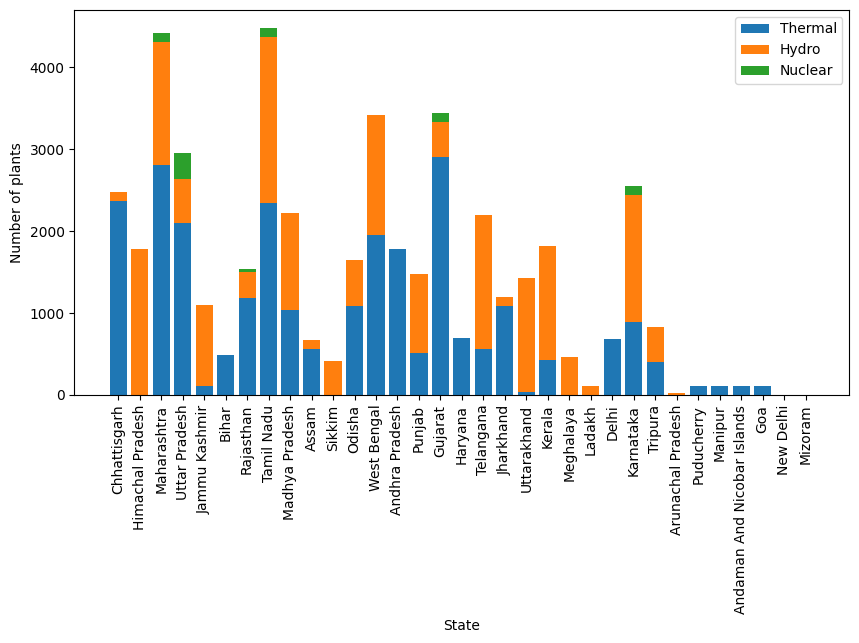

In [ ]:
categories = list(state_data.keys())
thermal_data = [state_data[category]['THERMAL'] for category in categories]
hydro_data = [state_data[category]['HYDRO'] for category in categories]
nuclear_data = [state_data[category]['NUCLEAR'] for category in categories]

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(categories, thermal_data, label='Thermal')
ax.bar(categories, hydro_data, bottom=thermal_data, label='Hydro')
ax.bar(categories, nuclear_data, bottom=[x + y for x, y in zip(thermal_data, hydro_data)], label='Nuclear')
plt.xticks(rotation='vertical')
plt.xlabel("State")
plt.ylabel("Number of plants")
plt.legend()


### Q7: What's the distribution of the sector of power plants in the states

In [ ]:
sectors

array(['PRIVATE IPP', 'STATE', 'CENTRAL', 'PRIVATE', 'PVT'], dtype=object)

In [ ]:
state_sector_data = {state: {sector: 0 for sector in sectors} for state in states}
state_sector_data

{'Chhattisgarh': {'PRIVATE IPP': 0,
  'STATE': 0,
  'CENTRAL': 0,
  'PRIVATE': 0,
  'PVT': 0},
 'Himachal Pradesh': {'PRIVATE IPP': 0,
  'STATE': 0,
  'CENTRAL': 0,
  'PRIVATE': 0,
  'PVT': 0},
 'Maharashtra': {'PRIVATE IPP': 0,
  'STATE': 0,
  'CENTRAL': 0,
  'PRIVATE': 0,
  'PVT': 0},
 'Uttar Pradesh': {'PRIVATE IPP': 0,
  'STATE': 0,
  'CENTRAL': 0,
  'PRIVATE': 0,
  'PVT': 0},
 'Jammu Kashmir': {'PRIVATE IPP': 0,
  'STATE': 0,
  'CENTRAL': 0,
  'PRIVATE': 0,
  'PVT': 0},
 'Bihar': {'PRIVATE IPP': 0, 'STATE': 0, 'CENTRAL': 0, 'PRIVATE': 0, 'PVT': 0},
 'Rajasthan': {'PRIVATE IPP': 0,
  'STATE': 0,
  'CENTRAL': 0,
  'PRIVATE': 0,
  'PVT': 0},
 'Tamil Nadu': {'PRIVATE IPP': 0,
  'STATE': 0,
  'CENTRAL': 0,
  'PRIVATE': 0,
  'PVT': 0},
 'Madhya Pradesh': {'PRIVATE IPP': 0,
  'STATE': 0,
  'CENTRAL': 0,
  'PRIVATE': 0,
  'PVT': 0},
 'Assam': {'PRIVATE IPP': 0, 'STATE': 0, 'CENTRAL': 0, 'PRIVATE': 0, 'PVT': 0},
 'Sikkim': {'PRIVATE IPP': 0,
  'STATE': 0,
  'CENTRAL': 0,
  'PRIVATE': 0,
  

In [ ]:
for state in states:
    for sector in sectors:
        condition = (df['State'] == state) & (df['Sector of power plant'] == sector)
        length = len(df.loc[condition])
        state_sector_data[state][sector] = length


In [ ]:
state_sector_data

{'Chhattisgarh': {'PRIVATE IPP': 1141,
  'STATE': 642,
  'CENTRAL': 333,
  'PRIVATE': 0,
  'PVT': 360},
 'Himachal Pradesh': {'PRIVATE IPP': 623,
  'STATE': 569,
  'CENTRAL': 454,
  'PRIVATE': 0,
  'PVT': 130},
 'Maharashtra': {'PRIVATE IPP': 1068,
  'STATE': 1819,
  'CENTRAL': 547,
  'PRIVATE': 623,
  'PVT': 360},
 'Uttar Pradesh': {'PRIVATE IPP': 739,
  'STATE': 963,
  'CENTRAL': 1077,
  'PRIVATE': 0,
  'PVT': 180},
 'Jammu Kashmir': {'PRIVATE IPP': 0,
  'STATE': 449,
  'CENTRAL': 654,
  'PRIVATE': 0,
  'PVT': 0},
 'Bihar': {'PRIVATE IPP': 0,
  'STATE': 107,
  'CENTRAL': 379,
  'PRIVATE': 0,
  'PVT': 0},
 'Rajasthan': {'PRIVATE IPP': 178,
  'STATE': 1070,
  'CENTRAL': 248,
  'PRIVATE': 0,
  'PVT': 36},
 'Tamil Nadu': {'PRIVATE IPP': 722,
  'STATE': 2889,
  'CENTRAL': 689,
  'PRIVATE': 0,
  'PVT': 178},
 'Madhya Pradesh': {'PRIVATE IPP': 427,
  'STATE': 1320,
  'CENTRAL': 327,
  'PRIVATE': 0,
  'PVT': 144},
 'Assam': {'PRIVATE IPP': 0,
  'STATE': 536,
  'CENTRAL': 130,
  'PRIVATE': 0,

#### A7:

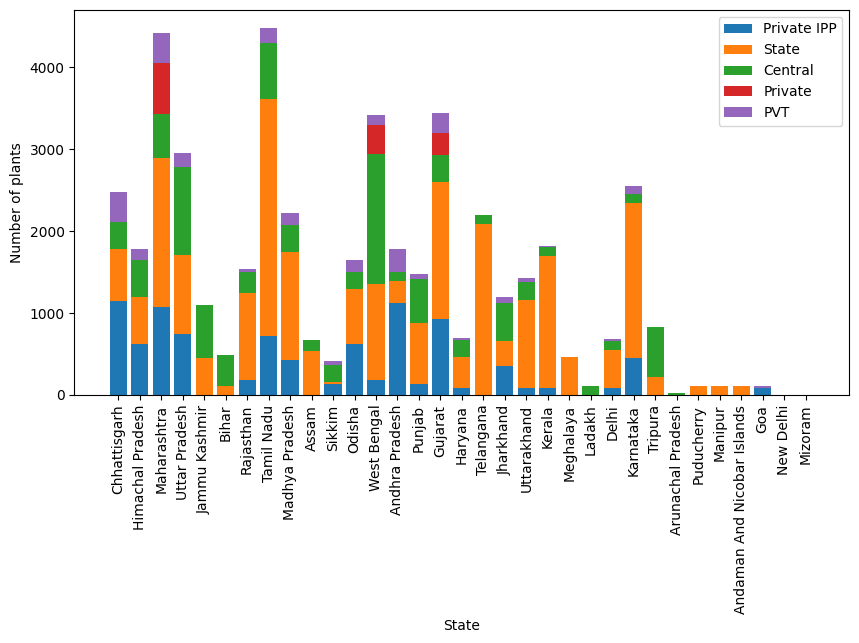

In [ ]:
categories = list(state_sector_data.keys())
private_ipp = [state_sector_data[category]['PRIVATE IPP'] for category in categories]
state = [state_sector_data[category]['STATE'] for category in categories]
central = [state_sector_data[category]['CENTRAL'] for category in categories]
private = [state_sector_data[category]['PRIVATE'] for category in categories]
pvt = [state_sector_data[category]['PVT'] for category in categories]


fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(categories, private_ipp, label='Private IPP')
ax.bar(categories, state, bottom=private_ipp, label='State')
ax.bar(categories, central, bottom=[x + y for x, y in zip(private_ipp, state)], label='Central')
ax.bar(categories, private, bottom=[x + y + z for x, y, z in zip(private_ipp, state, central)], label='Private')
ax.bar(categories, pvt, bottom=[x + y + z + w for x, y, z, w in zip(private_ipp, state, central, private)], label='PVT')


plt.xticks(rotation='vertical')
plt.xlabel("State")
plt.ylabel("Number of plants")
plt.legend()


### Q8: When were the power plants commissioned

In [ ]:
year_data = {year: len(df.loc[df['YearCode'] == year]) for year in years}
year_data = dict(sorted(year_data.items(), key=lambda item: item[0]))
year_data

{2008: 3834,
 2009: 5094,
 2010: 5088,
 2011: 5070,
 2012: 5046,
 2013: 5088,
 2014: 5339,
 2015: 5457,
 2016: 5211,
 2017: 1448}

#### A8:

Text(0, 0.5, 'Number of plants')

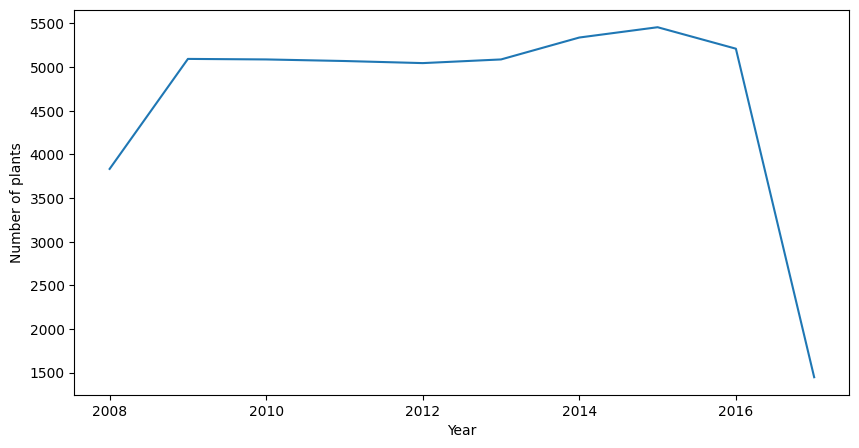

In [ ]:
x = list(year_data.keys())
y = list(year_data.values())
fig = plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.xlabel("Year")
plt.ylabel("Number of plants")

### Q9: How many plants were running in that year

#### A9:

Text(0, 0.5, 'Number of plants')

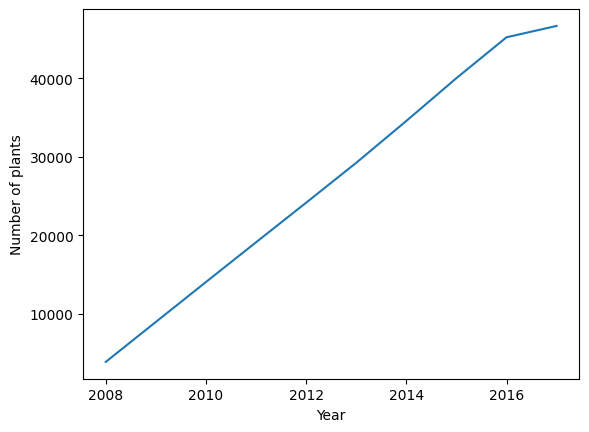

In [ ]:
def cumulative_sum(nums):
    return [sum(nums[:i+1]) for i in range(len(nums))]

y1 = cumulative_sum(y)
plt.plot(x, y1)
plt.xlabel("Year")
plt.ylabel("Number of plants")

### Q10: Which are the top coal companies

In [ ]:
companies = df['Name of coal company'].unique()
companies

array(['WPCL', 'ADHPL', 'IBPL', 'LAPPL', 'KWPCL', 'JK  PDD', 'BALCO',
       'DBPCL', 'NTPC Ltd', 'BEPL', 'NLC', 'IEPL', 'TNGDCL', 'NSPCL',
       'BPSCL', 'APGPCL', 'LGPPL', 'VIP', 'NHPC', 'RRVUNL', 'GIL', 'JPL',
       'DIPL', 'DVC', 'EEL', 'GAUTAMI', 'GEPL', 'GVKP&IL', 'GSEGL',
       'IBPIL', 'APCPL', 'RWPL (JSW)', 'JSWEL', 'APGENCO', 'GMR ENERG',
       'JKHPCL', 'ACB', 'VESPL', 'APL', 'KONA', 'KONDAPALI', 'THDC',
       'NPC', 'KSEB', 'ADHUNIK', 'ESSARPMPL', 'JhPL(HR)', 'SMHPCL', 'MPL',
       'CPL', 'EPPL', 'CSPGCL', 'AMNEPL', 'CGPL', 'MeECL', 'LANCO',
       'GSECL', 'IPGPCL', 'HPGCL', 'SJVNL', 'SCPL', 'RGPPL', 'NDPL',
       'RPSCL', 'EPGL', 'RPL', 'MPPGCL', 'SEPL', 'HSPCL', 'SEL',
       'TOR POW (SUGEN)', 'SVPPL', 'SUL', 'MEL', 'UPCL', 'HPSEB',
       'TOR POW (UNOSUGEN)', 'NTECL', 'VVL', 'NTPC Ltd.', 'E.P.P.L.',
       'TOR. POW. (UNOSUGEN)', 'APGCL', 'NALCO', 'MCCPL', 'SKS', 'HEL',
       'DEPL', 'NEEPCO.', 'NTPCIR', 'JPPVL', 'TPTCL', 'JHAPL', 'TUL',
       'TRNE', 'NLCTNE

In [ ]:
company_data = {company: len(df.loc[df['Name of coal company'] == company]) for company in companies}
company_data

{'WPCL': 214,
 'ADHPL': 107,
 'IBPL': 178,
 'LAPPL': 107,
 'KWPCL': 107,
 'JK  PDD': 264,
 'BALCO': 107,
 'DBPCL': 110,
 'NTPC Ltd': 24,
 'BEPL': 535,
 'NLC': 542,
 'IEPL': 107,
 'TNGDCL': 2889,
 'NSPCL': 107,
 'BPSCL': 74,
 'APGPCL': 536,
 'LGPPL': 84,
 'VIP': 107,
 'NHPC': 2045,
 'RRVUNL': 1070,
 'GIL': 89,
 'JPL': 231,
 'DIPL': 107,
 'DVC': 1070,
 'EEL': 107,
 'GAUTAMI': 107,
 'GEPL': 107,
 'GVKP&IL': 263,
 'GSEGL': 214,
 'IBPIL': 214,
 'APCPL': 107,
 'RWPL (JSW)': 107,
 'JSWEL': 321,
 'APGENCO': 2002,
 'GMR ENERG': 214,
 'JKHPCL': 82,
 'ACB': 187,
 'VESPL': 107,
 'APL': 321,
 'KONA': 107,
 'KONDAPALI': 237,
 'THDC': 214,
 'NPC': 588,
 'KSEB': 1605,
 'ADHUNIK': 107,
 'ESSARPMPL': 107,
 'JhPL(HR)': 107,
 'SMHPCL': 107,
 'MPL': 107,
 'CPL': 105,
 'EPPL': 1,
 'CSPGCL': 642,
 'AMNEPL': 107,
 'CGPL': 107,
 'MeECL': 468,
 'LANCO': 114,
 'GSECL': 1100,
 'IPGPCL': 464,
 'HPGCL': 369,
 'SJVNL': 214,
 'SCPL': 107,
 'RGPPL': 321,
 'NDPL': 107,
 'RPSCL': 107,
 'EPGL': 107,
 'RPL': 84,
 'MPPGCL'

In [ ]:
sorted_company_data = {k: v for k, v in sorted(company_data.items(), key=lambda item: item[1], reverse=True)}
sorted_company_data

{'TNGDCL': 2889,
 'NTPC Ltd.': 2651,
 'NHPC': 2045,
 'APGENCO': 2002,
 'KPCL': 1894,
 'MAHAGENCO': 1819,
 'KSEB': 1605,
 'MPPGCL': 1320,
 'GSECL': 1100,
 'RRVUNL': 1070,
 'DVC': 1070,
 'UJVNL': 1070,
 'WBPDC': 749,
 'PSPCL': 749,
 'NEEPCO.': 696,
 'CSPGCL': 642,
 'NPC': 588,
 'OHPC': 561,
 'NLC': 542,
 'APGPCL': 536,
 'BEPL': 535,
 'HPSEB': 535,
 'BBMB': 535,
 'UPRVUNL': 535,
 'TOR. POW. (UNOSUGEN)': 479,
 'MeECL': 468,
 'IPGPCL': 464,
 'UPJVNL': 428,
 'TATA PCL': 428,
 'CESC': 426,
 'TATA MAH.': 424,
 'HPGCL': 369,
 'JSWEL': 321,
 'APL': 321,
 'RGPPL': 321,
 'WBSEDCL': 321,
 'GIPCL': 321,
 'TSGENCO': 266,
 'JK  PDD': 264,
 'GVKP&IL': 263,
 'KONDAPALI': 237,
 'JPL': 231,
 'WPCL': 214,
 'GSEGL': 214,
 'IBPIL': 214,
 'GMR ENERG': 214,
 'THDC': 214,
 'SJVNL': 214,
 'TSECL': 214,
 'SSNNL': 214,
 'NHDC': 214,
 'JSEB': 196,
 'JPPVL': 192,
 'ACB': 187,
 'IBPL': 178,
 'NPCIL': 161,
 'SEL': 129,
 'LANCO': 114,
 'JKSPDC': 113,
 'DBPCL': 110,
 'ADHPL': 107,
 'LAPPL': 107,
 'KWPCL': 107,
 'BALCO':

#### A10:

In [ ]:
for i, company in enumerate(sorted_company_data):
    if i == 10:
        break
    print(f"{i+1} : {company} with {sorted_company_data[company]} coal plants")

1 : TNGDCL with 2889 coal plants
2 : NTPC Ltd. with 2651 coal plants
3 : NHPC with 2045 coal plants
4 : APGENCO with 2002 coal plants
5 : KPCL with 1894 coal plants
6 : MAHAGENCO with 1819 coal plants
7 : KSEB with 1605 coal plants
8 : MPPGCL with 1320 coal plants
9 : GSECL with 1100 coal plants
10 : RRVUNL with 1070 coal plants


### Q11: What is the amount of installed capacity of energy per state

In [ ]:
installed_capacity = {state: 0 for state in states}
for state in states:
  installed_capacity[state] = df.loc[df['State'] == state]['Installed Capacity'].sum().round(2)
installed_capacity

{'Chhattisgarh': 1205254.0,
 'Himachal Pradesh': 398970.85,
 'Maharashtra': 2365299.0,
 'Uttar Pradesh': 2005771.62,
 'Jammu Kashmir': 282094.0,
 'Bihar': 341300.0,
 'Rajasthan': 692437.59,
 'Tamil Nadu': 1394109.01,
 'Madhya Pradesh': 1295150.0,
 'Assam': 81876.55,
 'Sikkim': 69877.0,
 'Odisha': 911538.25,
 'West Bengal': 1529812.4,
 'Andhra Pradesh': 929032.8,
 'Punjab': 812657.6,
 'Gujarat': 2083877.75,
 'Haryana': 527986.21,
 'Telangana': 918945.0,
 'Jharkhand': 509395.0,
 'Uttarakhand': 281477.85,
 'Kerala': 281053.78,
 'Meghalaya': 24177.0,
 'Ladakh': 1800.0,
 'Delhi': 259350.6,
 'Karnataka': 977240.02,
 'Tripura': 132805.3,
 'Arunachal Pradesh': 755.0,
 'Puducherry': 3773.5,
 'Manipur': 3852.0,
 'Andaman And Nicobar Islands': 8249.95,
 'Goa': 5136.0,
 'New Delhi': 84.0,
 'Mizoram': 0.0}

In [ ]:
installed_capacity = {k: v for k, v in sorted(installed_capacity.items(), key=lambda item: item[1], reverse=True)}
installed_capacity

{'Maharashtra': 2365299.0,
 'Gujarat': 2083877.75,
 'Uttar Pradesh': 2005771.62,
 'West Bengal': 1529812.4,
 'Tamil Nadu': 1394109.01,
 'Madhya Pradesh': 1295150.0,
 'Chhattisgarh': 1205254.0,
 'Karnataka': 977240.02,
 'Andhra Pradesh': 929032.8,
 'Telangana': 918945.0,
 'Odisha': 911538.25,
 'Punjab': 812657.6,
 'Rajasthan': 692437.59,
 'Haryana': 527986.21,
 'Jharkhand': 509395.0,
 'Himachal Pradesh': 398970.85,
 'Bihar': 341300.0,
 'Jammu Kashmir': 282094.0,
 'Uttarakhand': 281477.85,
 'Kerala': 281053.78,
 'Delhi': 259350.6,
 'Tripura': 132805.3,
 'Assam': 81876.55,
 'Sikkim': 69877.0,
 'Meghalaya': 24177.0,
 'Andaman And Nicobar Islands': 8249.95,
 'Goa': 5136.0,
 'Manipur': 3852.0,
 'Puducherry': 3773.5,
 'Ladakh': 1800.0,
 'Arunachal Pradesh': 755.0,
 'New Delhi': 84.0,
 'Mizoram': 0.0}

#### A11:

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'Maharashtra'),
  Text(1, 0, 'Gujarat'),
  Text(2, 0, 'Uttar Pradesh'),
  Text(3, 0, 'West Bengal'),
  Text(4, 0, 'Tamil Nadu'),
  Text(5, 0, 'Madhya Pradesh'),
  Text(6, 0, 'Chhattisgarh'),
  Text(7, 0, 'Karnataka'),
  Text(8, 0, 'Andhra Pradesh'),
  Text(9, 0, 'Telangana'),
  Text(10, 0, 'Odisha'),
  Text(11, 0, 'Punjab'),
  Text(12, 0, 'Rajasthan'),
  Text(13, 0, 'Haryana'),
  Text(14, 0, 'Jharkhand'),
  Text(15, 0, 'Himachal Pradesh'),
  Text(16, 0, 'Bihar'),
  Text(17, 0, 'Jammu Kashmir'),
  Text(18, 0, 'Uttarakhand'),
  Text(19, 0, 'Kerala'),
  Text(20, 0, 'Delhi'),
  Text(21, 0, 'Tripura'),
  Text(22, 0, 'Assam'),
  Text(23, 0, 'Sikkim'),
  Text(24, 0, 'Meghalaya'),
  Text(25, 0, 'Andaman And Nicobar Islands'),
  Text(26, 0, 'Goa'),
  Text(27, 0, 'Manipur'),
  Text(28, 0, 'Puduche

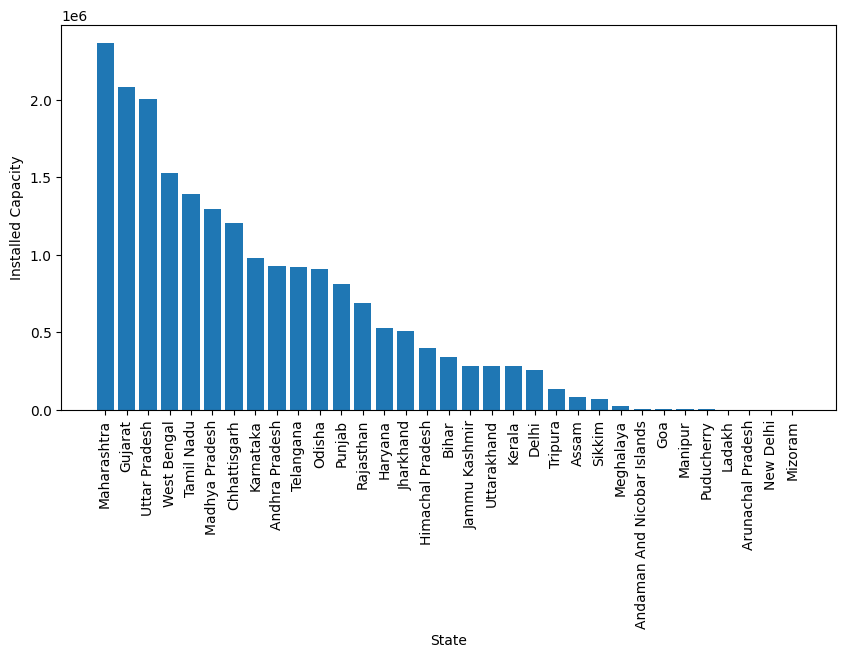

In [ ]:
fig = plt.figure(figsize=(10, 5))
plt.bar(list(installed_capacity.keys()), list(installed_capacity.values()))
plt.xlabel("State")
plt.ylabel("Installed Capacity")
plt.xticks(rotation='vertical')

## Q2: Seeing high levels of pollution in the country, you get curious about the trends in pollution and try to correlate it with the dataset for power plants you are given. How would you go about doing that? Is the current dataset sufficient to identify pollution trends? If not, what additional data would you need, and where would you obtain it? List the potential sources for acquiring this necessary data.

* Pollution is caused by various sources like combustion devices, motor vehicles, industrial facilites, forest fires, etc.

* But if we look into the distribution of pollution caused by these sources we find that **75.80% of green house gas emmisions is due to Energy Production**.

* Source - https://www.downtoearth.org.in/blog/pollution/5-rise-in-india-s-ghg-emissions-since-2016-driven-by-energy-industrial-sectors-94076

* So it is fair to approximate the trends in pollution to correspond to the amount of emissions released by these energy plants.

* The current dataset can give us an approximate of the amount of GHG emissions which correlates to the amount of pollution in India.

* Although if additional data about IPPU, Agriculture, Waste and Vehicle emissions is given, we can formulate a better approximation.

The amount of GHG emissions produced by the energy plants are:
* Thermal Plants - 584 g CO2/kWh
* Hydro Plants - 23 g CO2/kWh
* Nuclear Plants - 4 g CO2/kWh

Sources
* https://teriin.org/index.php/research-paper/assessment-greenhouse-gas-emissions-coal-and-natural-gas-thermal-power-plants-using#:~:text=The%20total%20GHG%20emission%20from,CO2%20eq%2FkWh%20electricity%20generation
* https://www.hydropower.org/factsheets/greenhouse-gas-emissions#:~:text=The%20results%20published%20in%20Water,consistent%20with%20the%20IPCC%20findings
* https://www.carbonbrief.org/solar-wind-nuclear-amazingly-low-carbon-footprints/

### Let's calculate the distibution of GHG emmisions by the States of India

In [ ]:
def assign_ghg_emission(category):
    if category == 'THERMAL':
        return 584
    elif category == 'HYDRO':
        return 23
    else:
        return 4
df['GHG Emission'] = df['Category of Plant'].apply(assign_ghg_emission)
df.head(5)

,ROWID,Country,State LGD Code,State,Actual energy generated,Category of Plant,Type of fuel used,Installed Capacity,Generation Programme is prepared by CEA,Region,...,Sector of power plant,Name of coal company,Station Name,SourceMonth,SourceYear,YearCode,Year,MonthCode,Month,GHG Emission
0,1,India,22,Chhattisgarh,0.0,THERMAL,COAL,0.0,0.0,WESTERN,...,PRIVATE IPP,WPCL,AKALTARA TPS,Apr - 2008,2008,2008,"Calendar Year (Jan - Dec), 2008",200804,"April, 2008",584
1,2,India,2,Himachal Pradesh,0.0,HYDRO,HYDRO,0.0,0.0,NORTHERN,...,PRIVATE IPP,ADHPL,ALLAIN DUHANGAN HPS,Apr - 2008,2008,2008,"Calendar Year (Jan - Dec), 2008",200804,"April, 2008",23
2,3,India,27,Maharashtra,0.0,THERMAL,COAL,0.0,0.0,WESTERN,...,PRIVATE IPP,IBPL,AMARAVATI TPS,Apr - 2008,2008,2008,"Calendar Year (Jan - Dec), 2008",200804,"April, 2008",584
3,4,India,9,Uttar Pradesh,0.0,THERMAL,COAL,0.0,0.0,NORTHERN,...,PRIVATE IPP,LAPPL,ANPARA C TPS,Apr - 2008,2008,2008,"Calendar Year (Jan - Dec), 2008",200804,"April, 2008",584
4,5,India,22,Chhattisgarh,0.0,THERMAL,COAL,0.0,0.0,WESTERN,...,PRIVATE IPP,KWPCL,AVANTHA BHANDAR,Apr - 2008,2008,2008,"Calendar Year (Jan - Dec), 2008",200804,"April, 2008",584


In [ ]:
emission_states = {state: df.loc[df['State'] == state]['GHG Emission'].sum() for state in states}
emission_states

{'Chhattisgarh': 1385957,
 'Himachal Pradesh': 40848,
 'Maharashtra': 1677090,
 'Uttar Pradesh': 1241741,
 'Jammu Kashmir': 85396,
 'Bihar': 283824,
 'Rajasthan': 694887,
 'Tamil Nadu': 1412579,
 'Madhya Pradesh': 635015,
 'Assam': 328917,
 'Sikkim': 9476,
 'Odisha': 644791,
 'West Bengal': 1174670,
 'Andhra Pradesh': 1042440,
 'Punjab': 318821,
 'Gujarat': 1708544,
 'Haryana': 402960,
 'Telangana': 362870,
 'Jharkhand': 638437,
 'Uttarakhand': 53017,
 'Kerala': 281945,
 'Meghalaya': 10764,
 'Ladakh': 2461,
 'Delhi': 395952,
 'Karnataka': 554670,
 'Tripura': 245104,
 'Arunachal Pradesh': 414,
 'Puducherry': 62488,
 'Manipur': 62488,
 'Andaman And Nicobar Islands': 62488,
 'Goa': 62488,
 'New Delhi': 584,
 'Mizoram': 69}

In [ ]:
emission_states = {k: v for k, v in sorted(emission_states.items(), key=lambda item: item[1], reverse=True)}
emission_states

{'Gujarat': 1708544,
 'Maharashtra': 1677090,
 'Tamil Nadu': 1412579,
 'Chhattisgarh': 1385957,
 'Uttar Pradesh': 1241741,
 'West Bengal': 1174670,
 'Andhra Pradesh': 1042440,
 'Rajasthan': 694887,
 'Odisha': 644791,
 'Jharkhand': 638437,
 'Madhya Pradesh': 635015,
 'Karnataka': 554670,
 'Haryana': 402960,
 'Delhi': 395952,
 'Telangana': 362870,
 'Assam': 328917,
 'Punjab': 318821,
 'Bihar': 283824,
 'Kerala': 281945,
 'Tripura': 245104,
 'Jammu Kashmir': 85396,
 'Puducherry': 62488,
 'Manipur': 62488,
 'Andaman And Nicobar Islands': 62488,
 'Goa': 62488,
 'Uttarakhand': 53017,
 'Himachal Pradesh': 40848,
 'Meghalaya': 10764,
 'Sikkim': 9476,
 'Ladakh': 2461,
 'New Delhi': 584,
 'Arunachal Pradesh': 414,
 'Mizoram': 69}

In [ ]:
for emission_state in emission_states:
  print(f"{emission_state} produces {emission_states[emission_state]} g CO2/kWh")

Gujarat produces 1708544 g CO2/kWh
Maharashtra produces 1677090 g CO2/kWh
Tamil Nadu produces 1412579 g CO2/kWh
Chhattisgarh produces 1385957 g CO2/kWh
Uttar Pradesh produces 1241741 g CO2/kWh
West Bengal produces 1174670 g CO2/kWh
Andhra Pradesh produces 1042440 g CO2/kWh
Rajasthan produces 694887 g CO2/kWh
Odisha produces 644791 g CO2/kWh
Jharkhand produces 638437 g CO2/kWh
Madhya Pradesh produces 635015 g CO2/kWh
Karnataka produces 554670 g CO2/kWh
Haryana produces 402960 g CO2/kWh
Delhi produces 395952 g CO2/kWh
Telangana produces 362870 g CO2/kWh
Assam produces 328917 g CO2/kWh
Punjab produces 318821 g CO2/kWh
Bihar produces 283824 g CO2/kWh
Kerala produces 281945 g CO2/kWh
Tripura produces 245104 g CO2/kWh
Jammu Kashmir produces 85396 g CO2/kWh
Puducherry produces 62488 g CO2/kWh
Manipur produces 62488 g CO2/kWh
Andaman And Nicobar Islands produces 62488 g CO2/kWh
Goa produces 62488 g CO2/kWh
Uttarakhand produces 53017 g CO2/kWh
Himachal Pradesh produces 40848 g CO2/kWh
Meghalaya

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'Gujarat'),
  Text(1, 0, 'Maharashtra'),
  Text(2, 0, 'Tamil Nadu'),
  Text(3, 0, 'Chhattisgarh'),
  Text(4, 0, 'Uttar Pradesh'),
  Text(5, 0, 'West Bengal'),
  Text(6, 0, 'Andhra Pradesh'),
  Text(7, 0, 'Rajasthan'),
  Text(8, 0, 'Odisha'),
  Text(9, 0, 'Jharkhand'),
  Text(10, 0, 'Madhya Pradesh'),
  Text(11, 0, 'Karnataka'),
  Text(12, 0, 'Haryana'),
  Text(13, 0, 'Delhi'),
  Text(14, 0, 'Telangana'),
  Text(15, 0, 'Assam'),
  Text(16, 0, 'Punjab'),
  Text(17, 0, 'Bihar'),
  Text(18, 0, 'Kerala'),
  Text(19, 0, 'Tripura'),
  Text(20, 0, 'Jammu Kashmir'),
  Text(21, 0, 'Puducherry'),
  Text(22, 0, 'Manipur'),
  Text(23, 0, 'Andaman And Nicobar Islands'),
  Text(24, 0, 'Goa'),
  Text(25, 0, 'Uttarakhand'),
  Text(26, 0, 'Himachal Pradesh'),
  Text(27, 0, 'Meghalaya'),
  Text(28, 0, 'Sik

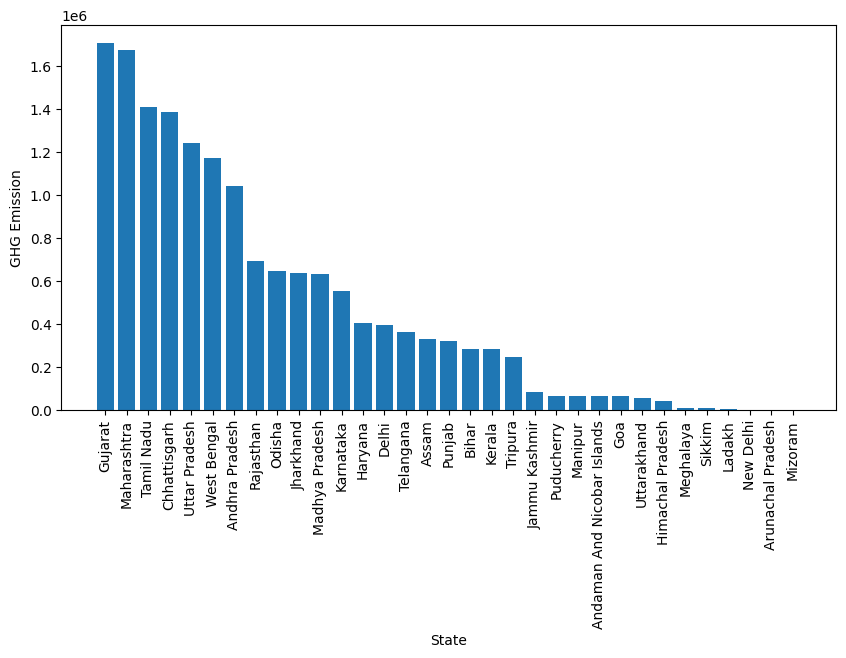

In [ ]:
fig = plt.figure(figsize=(10, 5))
plt.bar(list(emission_states.keys()), list(emission_states.values()))
plt.xlabel("State")
plt.ylabel("GHG Emission")
plt.xticks(rotation='vertical')

### Now let's see which source of energy is worse for the country and by how much

In [ ]:
emission_plant = {plant: df.loc[df['Category of Plant'] == plant]['GHG Emission'].sum() for plant in plants}
emission_plant

{'THERMAL': 15433368, 'HYDRO': 447695, 'NUCLEAR': 3132}

Text(0, 0.5, 'GHG Emission')

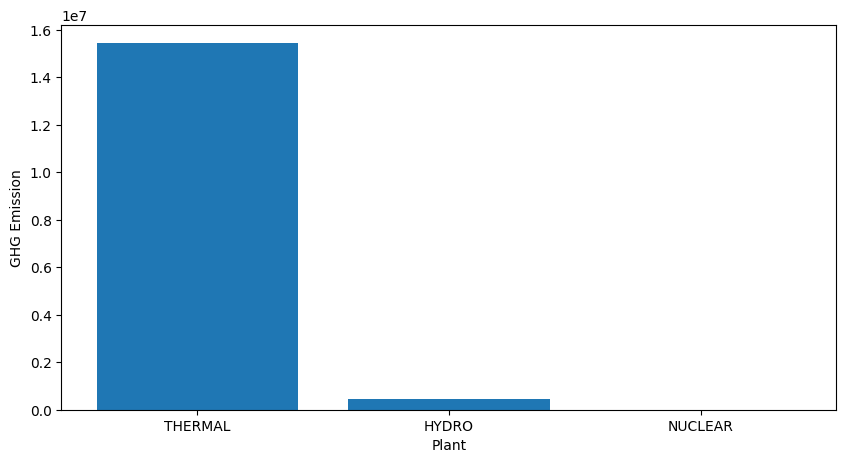

In [ ]:
fig = plt.figure(figsize=(10, 5))
plt.bar(list(emission_plant.keys()), list(emission_plant.values()))
plt.xlabel("Plant")
plt.ylabel("GHG Emission")

In [ ]:
emission_plant['THERMAL'] / (emission_plant['THERMAL'] + emission_plant['HYDRO'] + emission_plant['NUCLEAR']) * 100

97.16178880956825

### Conclusion
1. The top five states which produce the most pollution are Gujrat, Maharashtra, Tamil Nadu, Chattisgarh and Uttar Pradesh

2. Clearly from the bar graph we can see that the production of energy from thermal plants creates a lot more pollution than the production of energy from hydro or nuclear sources. To be precise, it releases 97.16% of the total emissions released by energy production sources